In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<center>
    
#     Big Five Personality Test
 

<center>
<img src='https://blog.adioma.com/wp-content/uploads/2018/11/big-five-personality-traits-infographic.png' width='500'>

* 1. What is the Big Five personality test used for?
* 2. Big Five personality traits

    * 2.1. Q&As Related to Extroversion Personality
    * 2.2. Q&As Related to Neuroticism Personality
    * 2.3. Q&As Related to Agreeable Personality
    * 2.4. Q&As Related to Conscientious Personality
    * 2.5. Q&As Related to Open Personality
    
    
* 3. The Big Five Personality Test in across Countries

    * 3.1. Extroversion Personality
    * 3.2. Neuroticism Personality
    * 3.3. Agreeable Personality
    * 3.4. Conscientious Personality
    * 3.5. Related to Open Personality
    
    
* 4. Clustering
    * 4.1 K-means
    * 4.2 PCA
    * 4.3 TSNE

# 1. What is the Big Five personality test used for?


The Big Five personality test gives you more insight into how you react in different situations, which can help you choose an occupation. Career professionals and psychologists use this information in a personality career test for recruitment and candidate assessment[[1]( https://www.123test.com/big-five-personality-theory/)].


The big five come from the statistical study of responses to personality items. Using a technique called factor analysis researchers can look at the responses of people to hundreds of personality items and ask the question "what is the best was to summarize an individual?". This has been done with many samples from all over the world and the general result is that, while there seem to be unlimited personality variables, five stand out from the pack in terms of explaining a lot of a persons answers to questions about their personality: extraversion, neuroticism, agreeableness, conscientiousness and openness to experience. The big-five are not associated with any particular test, a variety of measures have been developed to measure them. This test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg (1992)[[2](https://openpsychometrics.org/tests/IPIP-BFFM/)].

* Procedure

The test consists of fifty items that you must rate on how true they are about you on a five point scale where 1=Disagree, 3=Neutral and 5=Agree. It takes most people 3-8 minutes to complete.









In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/big-five.csv', delimiter='\t')
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,...,1655.0,1937.0,1233.0,3151.0,2576.0,1888.0,2815.0,2964.0,2665.0,2888.0,3008.0,2367.0,2504.0,2544.0,2144.0,4784.0,3529.0,5072.0,2016.0,3353.0,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,...,2422.0,1448.0,3216.0,6160.0,2208.0,1513.0,2785.0,3833.0,3280.0,1184.0,2096.0,1880.0,3209.0,1744.0,4392.0,1943.0,2263.0,1559.0,1304.0,2176.0,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1

In [ ]:
#Check Missing Value
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  186358
Number of participants after eliminating missing values:  1012050


# 2. Big Five personality traits

The Big Five personality traits are:

* Openness : 

People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

* Conscientiousness : 

People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

* Extraversion :

Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

* Agreeableness :

These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

* Neuroticism : 

Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.


## 2.1. Q&As Related to Extroversion Personality
 
  * EXT1 : I am the life of the party,
  * EXT2 : I dont talk a lot,
  * EXT3 : I feel comfortable around people,
  * EXT4 : I keep in the background,
  * EXT5 : I start conversations,
  * EXT6 : I have little to say,
  * EXT7 : I talk to a lot of different people at parties,
  * EXT8 : I dont like to draw attention to myself,
  * EXT9 : I dont mind being the center of attention,
  * EXT10: I am quiet around strangers

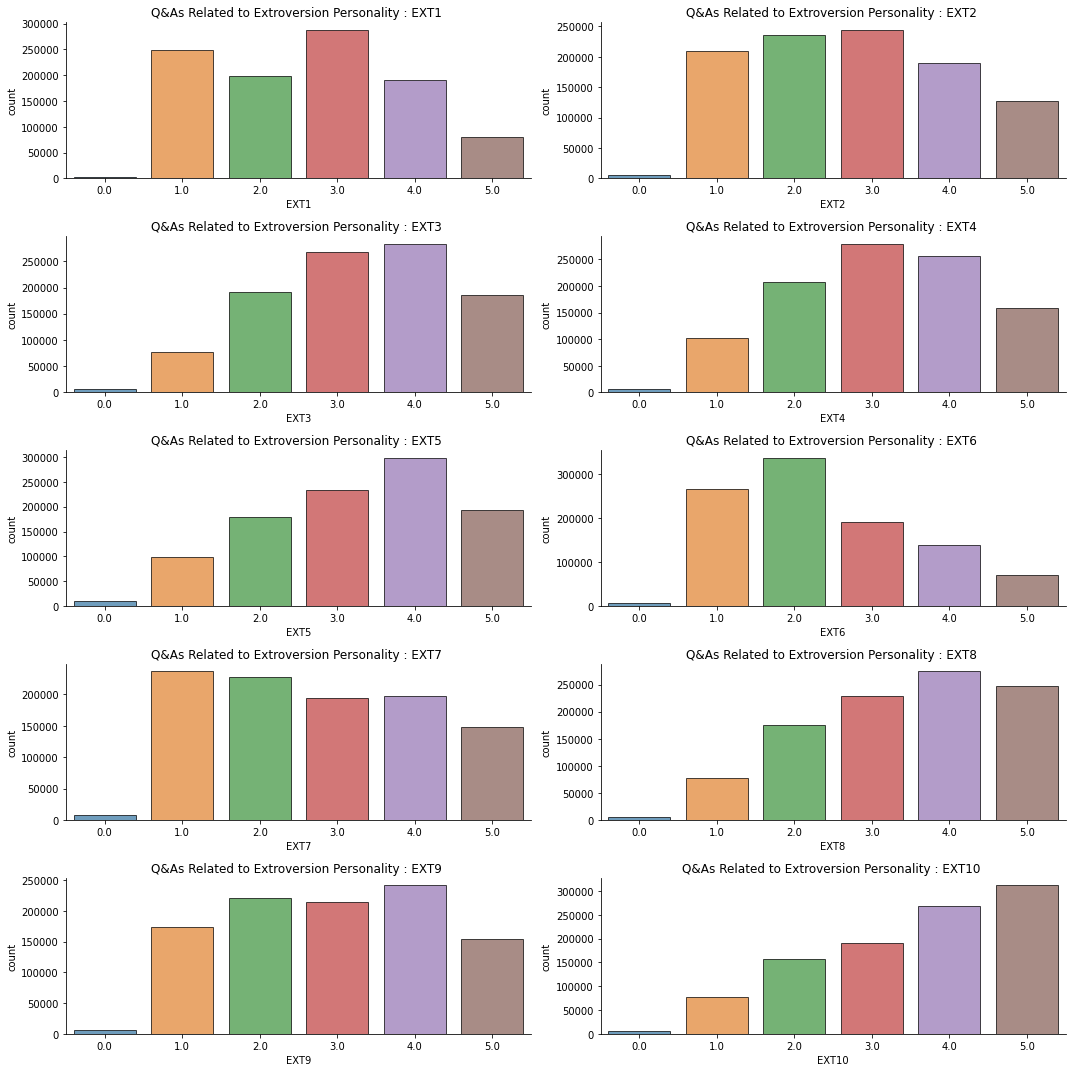

In [ ]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## 2.2. Q&As Related to Neuroticism Personality

* EST1 : I get stressed out easily,
* EST2 : I am relaxed most of the time,
* EST3 : I worry about things,
* EST4 : I seldom feel blue,
* EST5 : I am easily disturbed,
* EST6 : I get upset easily,
* EST7 : I change my mood a lot,
* EST8 : I have frequent mood swings,
* EST9 : I get irritated easily,
* EST10: I often feel blue

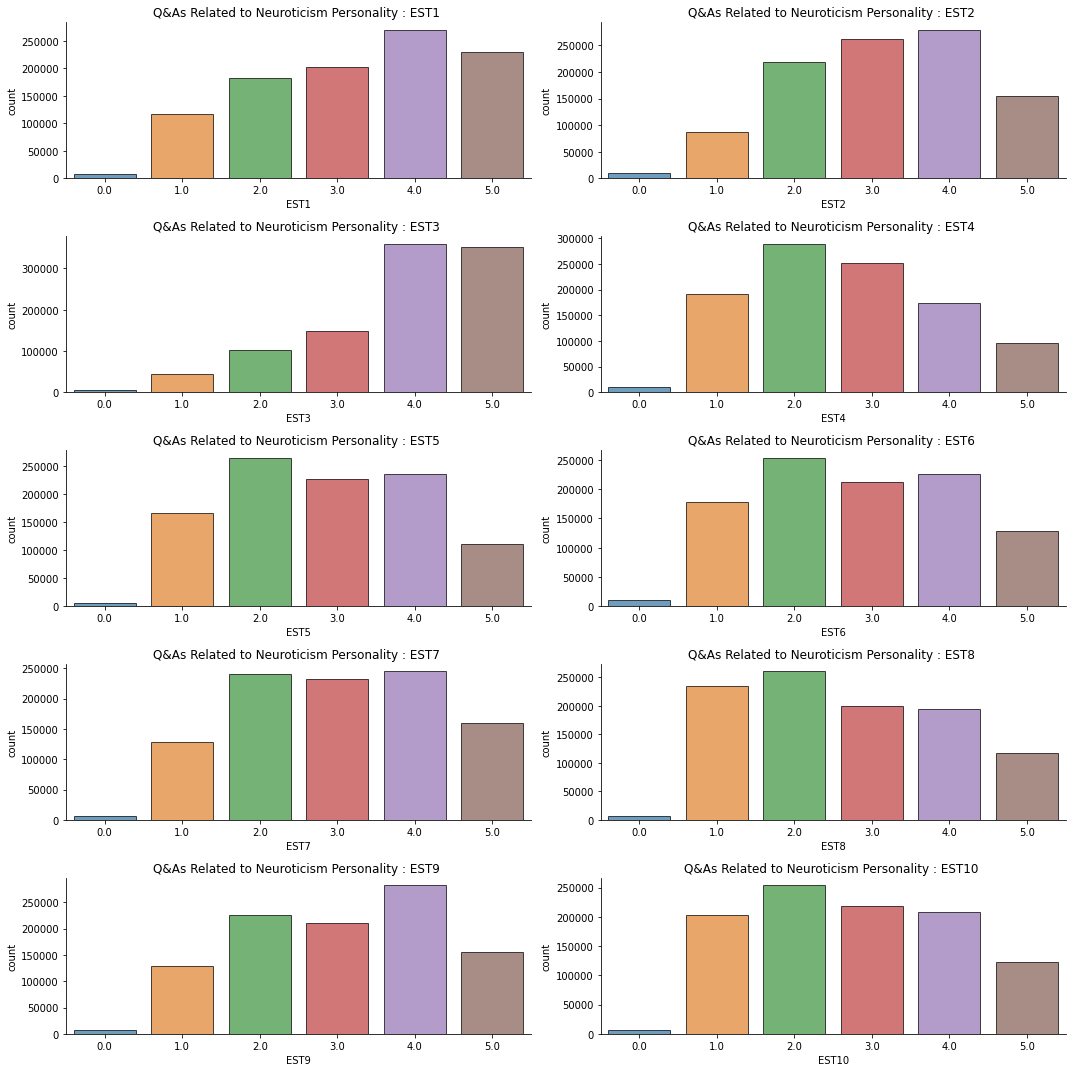

In [ ]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## 2.3. Q&As Related to Agreeable Personality

* AGR1 : I feel little concern for others,
* AGR2 : I am interested in people,
* AGR3 : I insult people,
* AGR4 : I sympathize with others feelings,
* AGR5 : I am not interested in other peoples problems,
* AGR6 : I have a soft heart,
* AGR7 : I am not really interested in others,
* AGR8 : I take time out for others,
* AGR9 : I feel others emotions,
* AGR10: I make people feel at ease

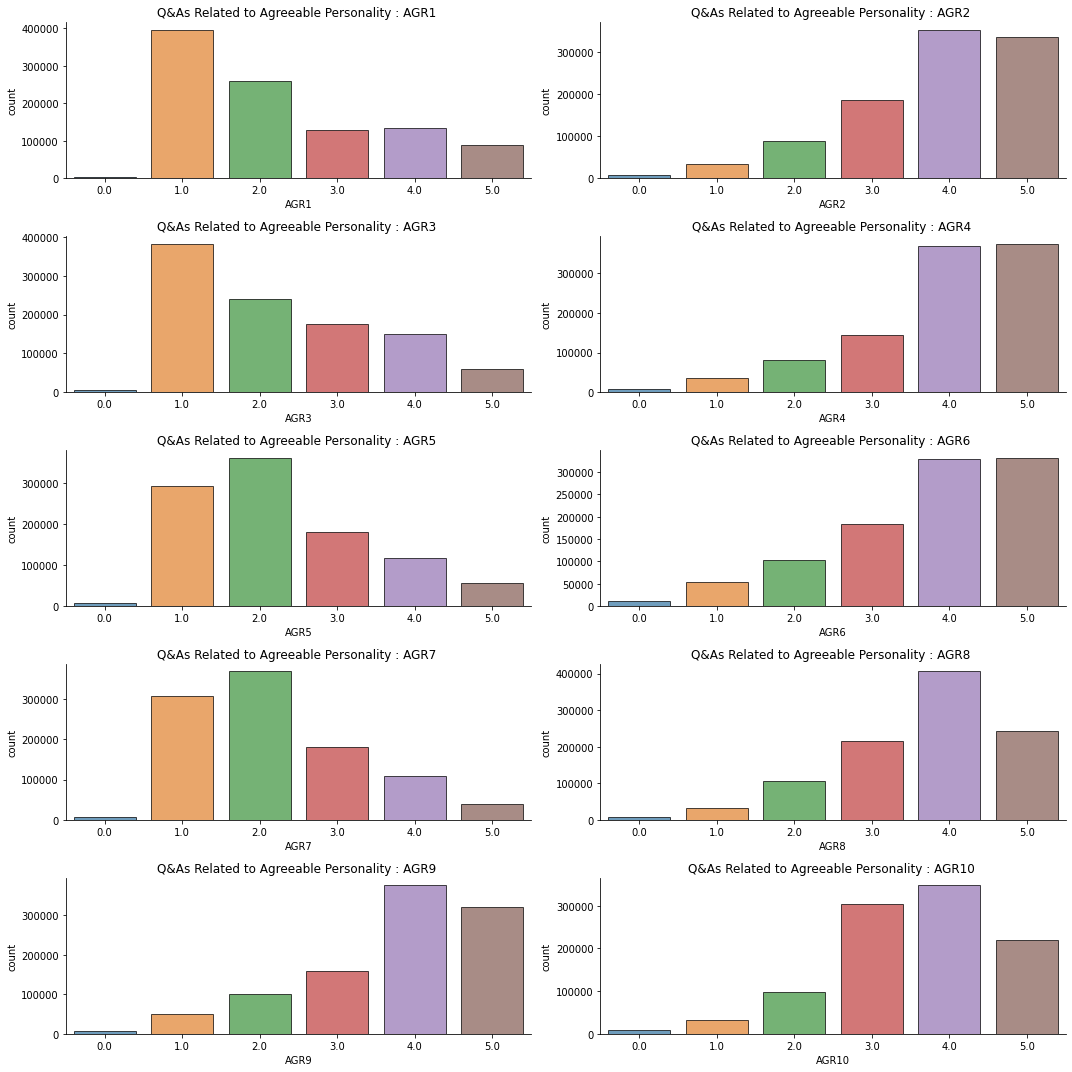

In [ ]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## 2.4. Q&As Related to Conscientious Personality
 
* CSN1 : I am always prepared,
* CSN2 : I leave my belongings around,
* CSN3 : I pay attention to details,
* CSN4 : I make a mess of things,
* CSN5 : I get chores done right away,
* CSN6 : I often forget to put things back in their proper place,
* CSN7 : I like order,
* CSN8 : I shirk my duties,
* CSN9 : I follow a schedule,
* CSN10 : I am exacting in my work

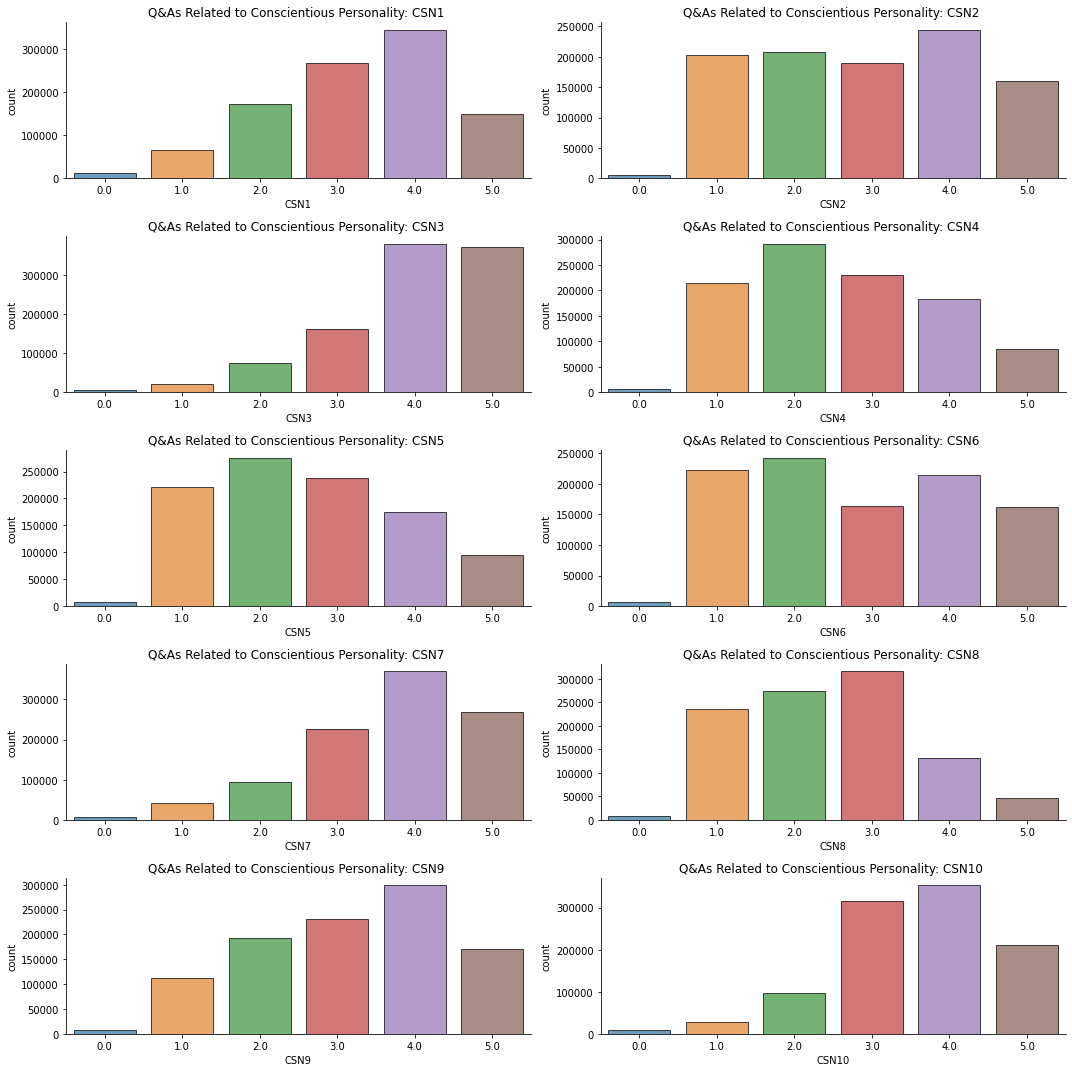

In [ ]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## 2.5. Q&As Related to Open Personality


* OPN1 : I have a rich vocabulary,
* OPN2 : I have difficulty understanding abstract ideas,
* OPN3 : I have a vivid imagination,
* OPN4 : I am not interested in abstract ideas,
* OPN5 : I have excellent ideas,
* OPN6 : I do not have a good imagination,
* OPN7 : I am quick to understand things,
* OPN8 : I use difficult words,
* OPN9 : I spend time reflecting on things,
* OPN10: I am full of ideas

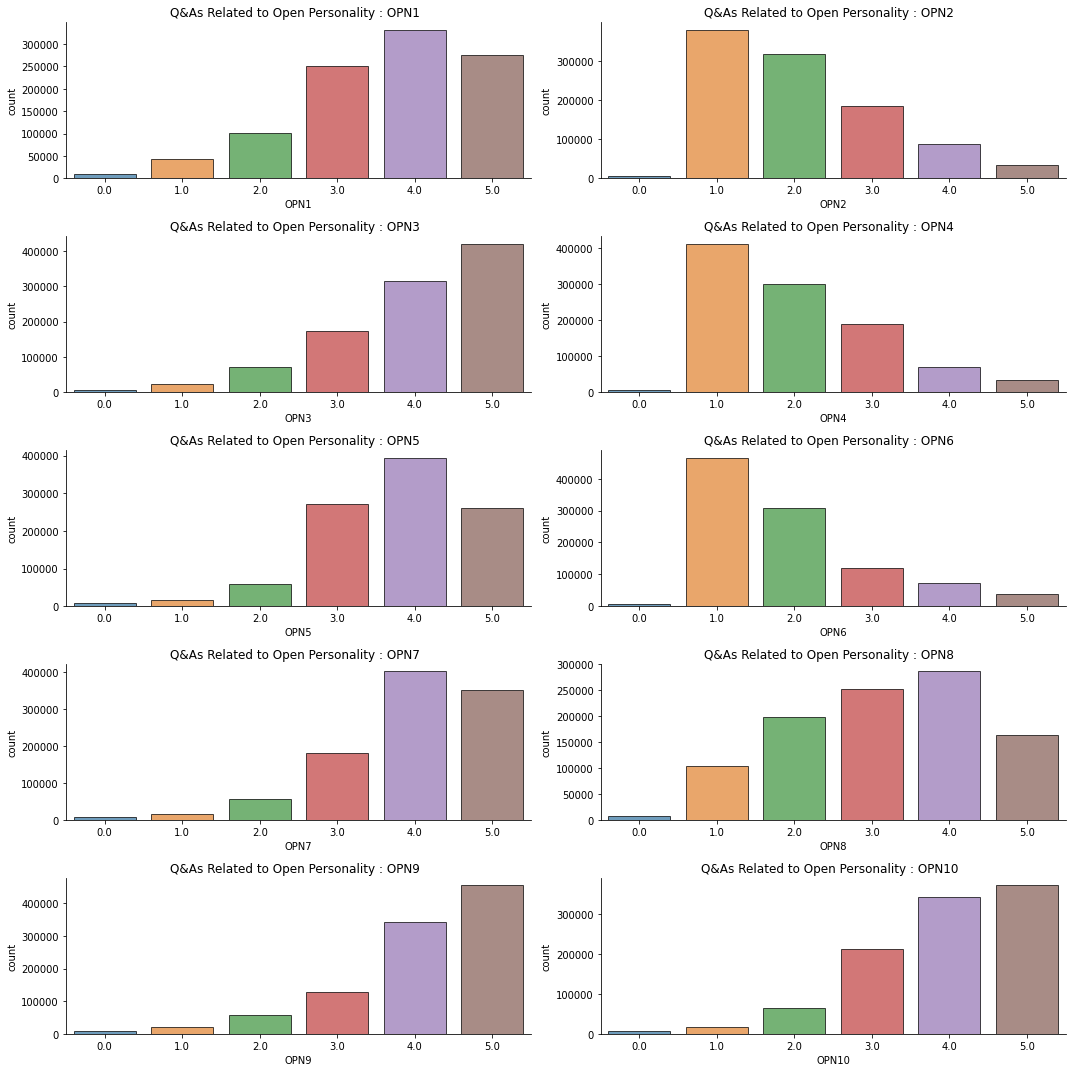

In [ ]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# 4.Clustering

Reference : https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means

In [ ]:
X=data.copy()
X.drop(X.columns[50:107], axis=1, inplace=True)
X.drop(X.columns[51:], axis=1, inplace=True)

## 4.1 K-means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

df_model = X.drop('country', axis=1)

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [ ]:
df_model.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'Clusters'],
      dtype='object')

In [ ]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()


,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.908591,2.528838,2.850546,2.914796,3.120843
1,3.085158,2.422935,3.208866,3.106663,3.327754
2,3.072223,3.427559,3.300143,3.211500,3.352378
3,2.966159,3.646170,3.149489,3.173789,3.245876
4,3.052785,2.976056,3.187332,3.157895,3.242715


## 4.2 PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [ ]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.621909,-1.412229,1
1,0.680965,2.360744,4
2,-0.241593,1.612890,4
3,0.627656,0.805426,0
4,-4.673158,1.776341,1


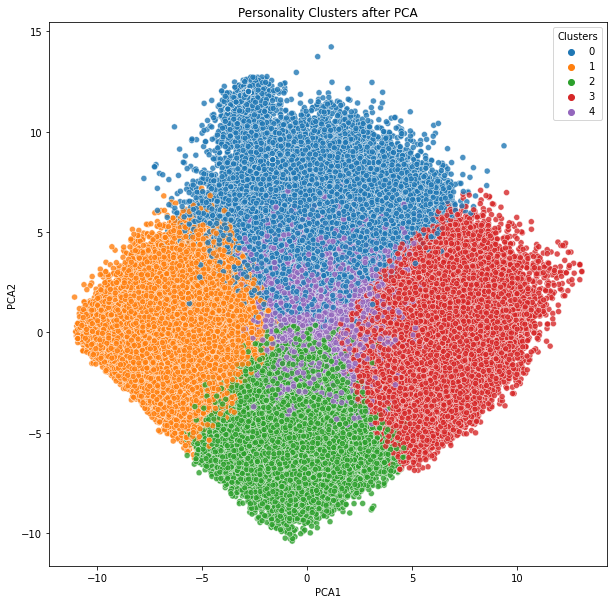

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

References : 
* [1] https://www.123test.com/big-five-personality-theory/
* [2] https://openpsychometrics.org/tests/IPIP-BFFM/
* [3] Goldberg, Lewis R. "The development of markers for the Big-Five factor structure." Psychological assessment 4.1 (1992): 26.
* [4] https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means
* [5] http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
* [6] https://www.datacamp.com/community/tutorials/introduction-t-sne
* [7] Viz Ref: https://www.kaggle.com/dwin183287/kagglers-seen-by-continents


In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Data/testn.csv')
X_test = X_test.astype(np.float)
X_test

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,3.0,4.0,2.0,3.0,3.0,...,4.0,3.0,3.0,3.0,2.0


In [ ]:
# predict labels on the test set

test_labels = kmeans.predict(X_test)
X_test_clstrs = X_test.copy()
X_test_clstrs['clusters'] = test_labels

print(X_test_clstrs)

   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  ...  \
0         3.0         4.0         2.0         3.0         3.0  ...   

   Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  clusters  
0          3.0          3.0          3.0          2.0         3  

[1 rows x 51 columns]


In [ ]:
col_list = list(X_test_clstrs)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

test_mean = pd.DataFrame()
test_mean['extroversion'] = X_test_clstrs[ext].sum(axis=1)/10
test_mean['neurotic'] = X_test_clstrs[est].sum(axis=1)/10
test_mean['agreeable'] = X_test_clstrs[agr].sum(axis=1)/10
test_mean['conscientious'] = X_test_clstrs[csn].sum(axis=1)/10
test_mean['open'] = X_test_clstrs[opn].sum(axis=1)/10
test_mean

,extroversion,neurotic,agreeable,conscientious,open
0,3.4,3.6,3.3,2.9,3.0
